In [11]:
import sys
sys.path.insert(0, 'ThinkDSP/code/') 
import thinkdsp
import matplotlib.pyplot as pyplot
import IPython
import thinkplot

No handles with labels found to put in legend.


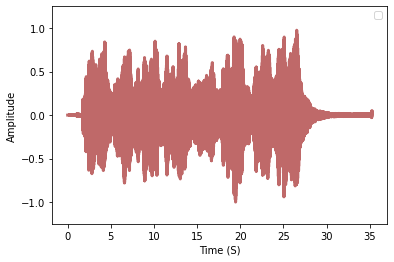

In [12]:
wave = thinkdsp.read_wave('veena.wav')
wave.plot(color='brown')
thinkplot.config(xlabel='Time (S)', ylabel='Amplitude', ylim=[-1.25, 1.25])

In [13]:
clipLength = 10 # in seconds
index = 0
while (index < wave.ts.size and wave.ts[index] < clipLength):
	index += 1
# Remove extras
wave.ts = wave.ts[:index]
wave.ys = wave.ys[:index]


In [14]:
spectrum = wave.make_spectrum()
spectrum.high_pass(cutoff =3500, factor = .1) # FIXME - Change back to low pass filter
filteredWave = spectrum.make_wave()

In [15]:
filteredWave.ys *= 10 # Increase the filtered wave's power so the treble effect is more noticable
combinedWave = filteredWave + wave

No handles with labels found to put in legend.


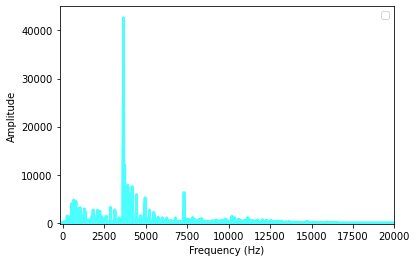

In [16]:
spectrum = filteredWave.make_spectrum()
spectrum.plot(color='cyan')
thinkplot.config(xlabel='Frequency (Hz)', xlim=[-200, 20000], ylabel='Amplitude', ylim=[-200, 45000])

In [17]:
spectrum.peaks()[:5]

[(42609.47719745707, 3656.9),
 (40543.403716782756, 3657.2000000000003),
 (40369.40699918166, 3655.9),
 (38185.757188035364, 3656.2000000000003),
 (36666.03432785794, 3655.6000000000004)]

In [18]:
combinedWave.play()
IPython.display.Audio('sound.wav')

Writing sound.wav


c:\program files\python37\lib\site-packages\thinkdsp.py:1115: UserWarning: Warning: normalizing before quantizing.
  warnings.warn('Warning: normalizing before quantizing.')


No handles with labels found to put in legend.


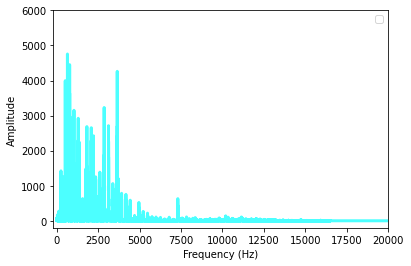

In [19]:
spectrum = wave.make_spectrum()
spectrum.plot(color='cyan')
thinkplot.config(xlabel='Frequency (Hz)', xlim=[-200, 20000], ylabel='Amplitude', ylim=[-200, 6000])

In [20]:
spectrum.peaks()[:5]

[(4755.114062901993, 652.1),
 (4451.066361558875, 783.4000000000001),
 (4260.947719745706, 3656.9),
 (4054.340371678277, 3657.2000000000003),
 (4036.940699918166, 3655.9)]

In [21]:
wave.corr(filteredWave)

0.6256763498489164